In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
sns.set_style("whitegrid")

In [58]:
data = pd.read_csv('../data/salaries.csv')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           12869 non-null  int64 
 1   experience_level    12869 non-null  object
 2   employment_type     12869 non-null  object
 3   job_title           12869 non-null  object
 4   salary              12869 non-null  int64 
 5   salary_currency     12869 non-null  object
 6   salary_in_usd       12869 non-null  int64 
 7   employee_residence  12869 non-null  object
 8   remote_ratio        12869 non-null  int64 
 9   company_location    12869 non-null  object
 10  company_size        12869 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [60]:
data.kurt(numeric_only=True)

work_year           2.615312
salary           3260.771792
salary_in_usd       6.724388
remote_ratio       -1.530245
dtype: float64

In [61]:
data['salary'].describe()

count    1.286900e+04
mean     1.672187e+05
std      3.808204e+05
min      1.400000e+04
25%      1.040000e+05
50%      1.422000e+05
75%      1.880000e+05
max      3.040000e+07
Name: salary, dtype: float64

In [62]:
data.boxplot(column=['salary'])

<Axes: >

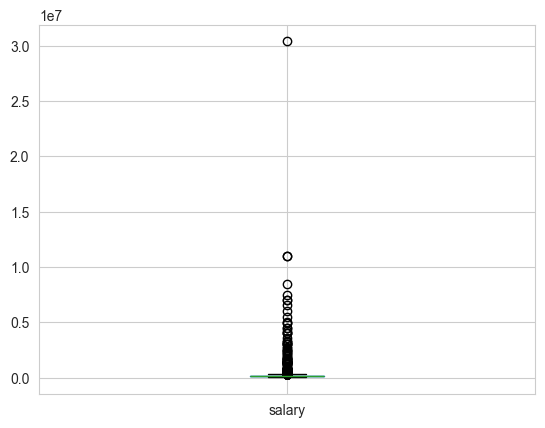

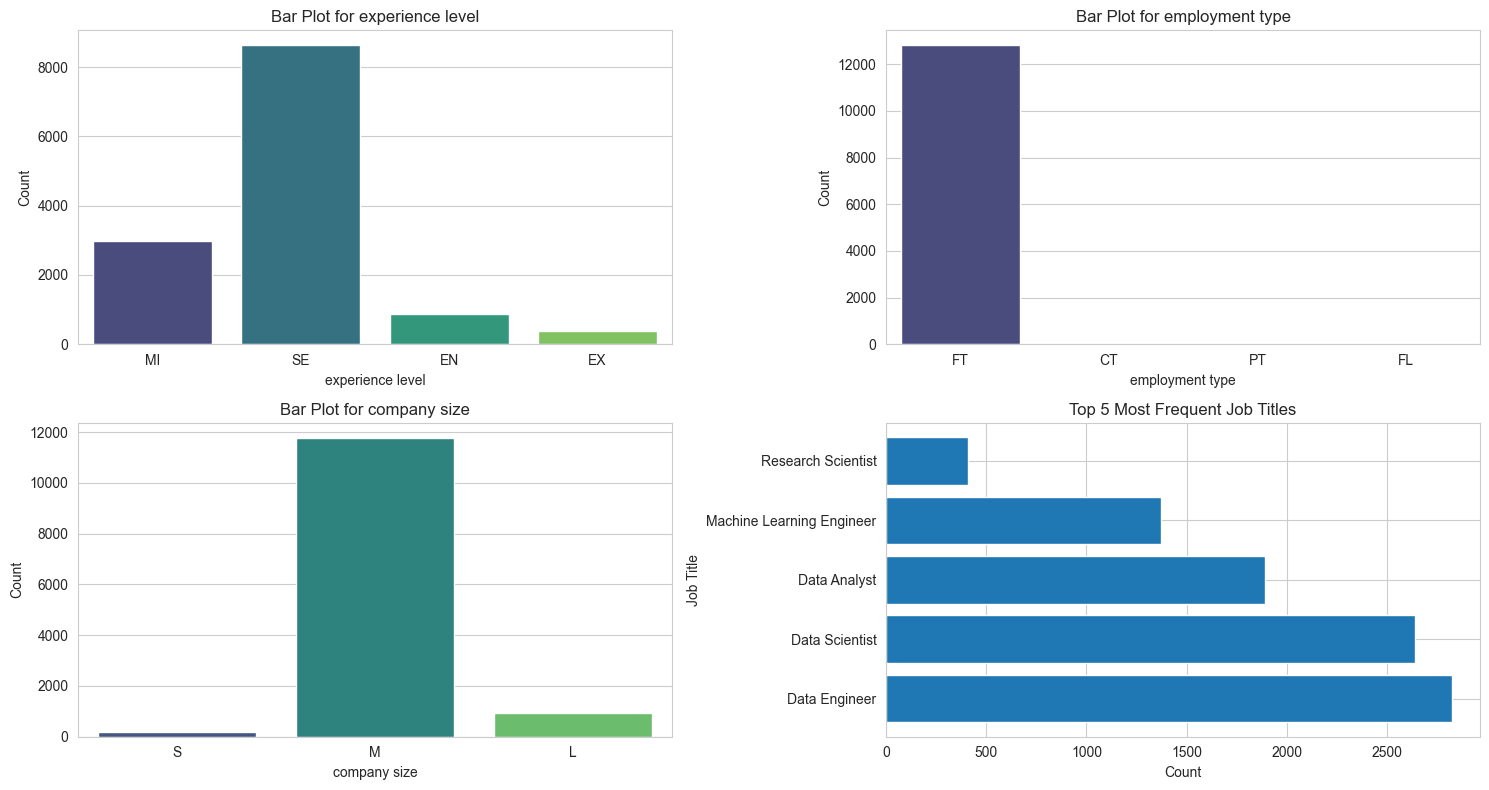

In [63]:
# Extract top job titles and filter data
top_job_titles = data['job_title'].value_counts().nlargest(5).index

filtered_data = data[data['job_title'].isin(top_job_titles)]


# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot bar charts for selected columns
selected_columns = ['experience_level', 'employment_type', 'company_size']
for i, column in enumerate(selected_columns):
    sns.countplot(x=column, data=data, palette="viridis", hue=column, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Bar Plot for {column.replace("_", " ")}')
    axes[i//2, i%2].set_xlabel(column.replace("_", " "))
    axes[i//2, i%2].set_ylabel('Count')

# Plot horizontal bar chart for top job titles
axes[1, 1].barh(top_job_titles, filtered_data['job_title'].value_counts().loc[top_job_titles])
axes[1, 1].set_title('Top 5 Most Frequent Job Titles')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Job Title')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [72]:
sns.pairplot(data)

KeyboardInterrupt: 

In [65]:
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

unique_values = {column: data[column].unique() for column in categorical_columns}

unique_values


{'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'job_title': array(['AI Programmer', 'Data Analyst', 'Machine Learning Scientist',
        'Data Architect', 'Machine Learning Engineer', 'Data Manager',
        'Data Engineer', 'Business Intelligence Engineer',
        'Data Scientist', 'Applied Scientist', 'Data Science',
        'Data Developer', 'AI Engineer', 'BI Developer', 'ETL Engineer',
        'Data Modeler', 'ML Engineer', 'Robotics Software Engineer',
        'Analytics Engineer', 'Business Intelligence', 'Head of Data',
        'AI Product Manager', 'Research Scientist', 'Research Engineer',
        'Research Analyst', 'Business Intelligence Analyst',
        'Business Intelligence Developer', 'Data Product Manager',
        'AI Architect', 'Business Intelligence Lead',
        'Data Management Specialist', 'Data Operations Associate',
        'Data Science Manager', 'Data Management Anal

In [66]:
# one hot encode the categorical columns that arent ordinal, then pca them. introduce more dimensions and then reduce them.

columns_to_encode = ['employment_type','job_title', 'salary_currency', 'employee_residence', 'company_location'] # year?? im not sure

encoder = OneHotEncoder(sparse_output=False)

def determine_n_components(unique_values_count):
    return min(max((unique_values_count + 19) // 20, 2), 10) # minimum of 2 and maximum of 10

for column in columns_to_encode:
    unique_values_count = len(data[column].unique())
    n_components = determine_n_components(unique_values_count)
    
    encoded_data = encoder.fit_transform(data[[column]])
    
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(encoded_data)
    
    new_columns = [f"{column}_pca_{i}" for i in range(n_components)]
    
    data.drop(column, axis=1, inplace=True)
    
    for i, new_column in enumerate(new_columns):
        data[new_column] = reduced_data[:, i]



In [67]:
# these are oridnal so we can map them to numbers instead of one hot encoding them
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}

data['experience_level'] = data['experience_level'].map(experience_level_mapping)
data['company_size'] = data['company_size'].map(company_size_mapping)


,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size,employment_type_pca_0,employment_type_pca_1,job_title_pca_0,job_title_pca_1,...,salary_currency_pca_1,employee_residence_pca_0,employee_residence_pca_1,employee_residence_pca_2,employee_residence_pca_3,employee_residence_pca_4,company_location_pca_0,company_location_pca_1,company_location_pca_2,company_location_pca_3
0,2024,2,30000,30000,0,1,-0.005344,-0.000082,-0.023268,0.101442,...,-0.003246,0.766677,0.191385,0.258761,-0.120186,-0.052985,0.764071,0.193922,0.267753,-0.102373
1,2024,2,75000,75000,100,2,-0.005344,-0.000082,-0.075215,0.754196,...,-0.003246,-0.140996,-0.007626,-0.004908,0.001182,0.000369,-0.137606,-0.007714,-0.004920,0.000987
2,2024,3,250000,250000,100,2,-0.005344,-0.000082,-0.024125,0.106168,...,-0.003246,-0.140996,-0.007626,-0.004908,0.001182,0.000369,-0.137606,-0.007714,-0.004920,0.000987
3,2024,3,125000,125000,100,2,-0.005344,-0.000082,-0.024125,0.106168,...,-0.003246,-0.140996,-0.007626,-0.004908,0.001182,0.000369,-0.137606,-0.007714,-0.004920,0.000987
4,2024,1,83300,83300,0,2,-0.005344,-0.000082,-0.075215,0.754196,...,-0.003246,-0.140996,-0.007626,-0.004908,0.001182,0.000369,-0.137606,-0.007714,-0.004920,0.000987


<Figure size 640x480 with 0 Axes>

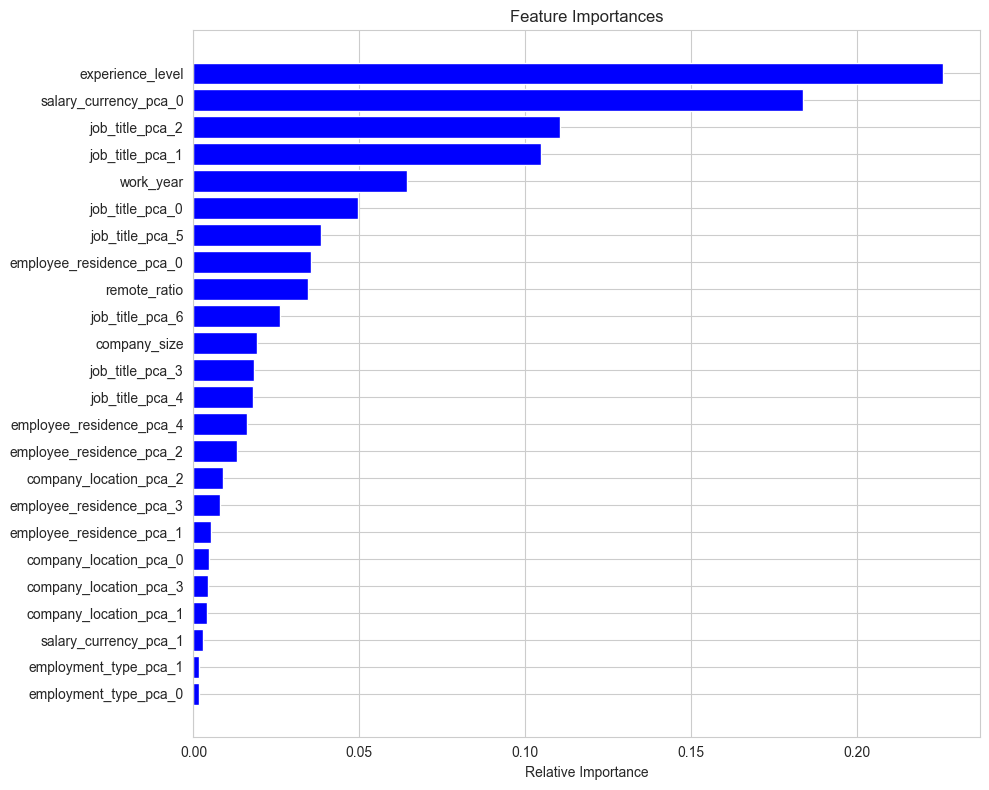

In [71]:
# use random forest to see the most important features. 

X = data.drop(['salary', 'salary_in_usd'], axis=1)
y = data['salary_in_usd']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

features = X.columns
importances = rf.feature_importances_
plt.clf()

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()
# we can choose which ones to use when creating the model. feature selction